# Analyzing Covid19


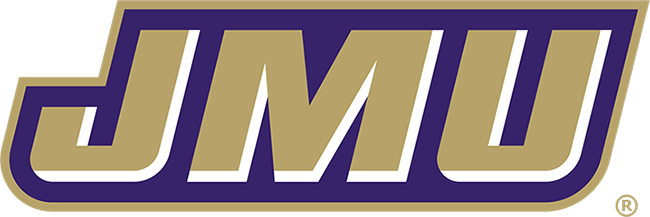



### COVID-19 (coronavirus disease 2019) is a disease caused by a virus named SARS-CoV-2 and was discovered in December 2019 in Wuhan, China.

### Data Source: [European Center for Disease Prevention and Control] (https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

### Author: Catie Reilly Email: reill4ca@dukes.jmu.edu



# Import data

In [2]:
%matplotlib inline
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [3]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 9.9 MB/s eta 0:00:00


In [4]:
df = pd.read_excel('s3://reilly-241-2023-python/covid_data.xls')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


# Number of Cases Per Day

/tmp/ipykernel_8028/1118466642.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep'])


<AxesSubplot: xlabel='dateRep'>

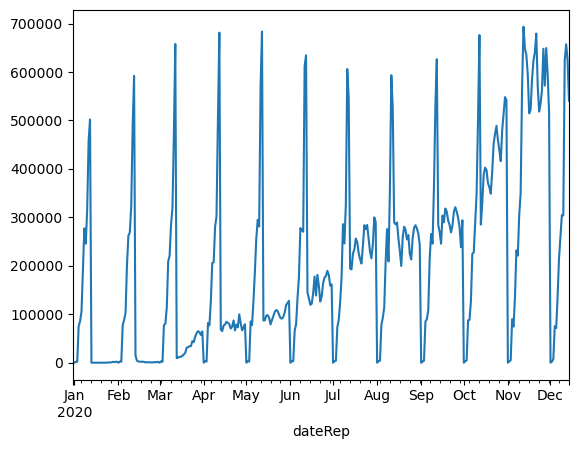

In [5]:
df['dateRep'] = pd.to_datetime(df['dateRep'])

sum_death_by_date = df.groupby('dateRep')['cases'].sum()
sum_death_by_date.plot()

#### more cases in Nov and Dec.

<AxesSubplot: xlabel='countriesAndTerritories'>

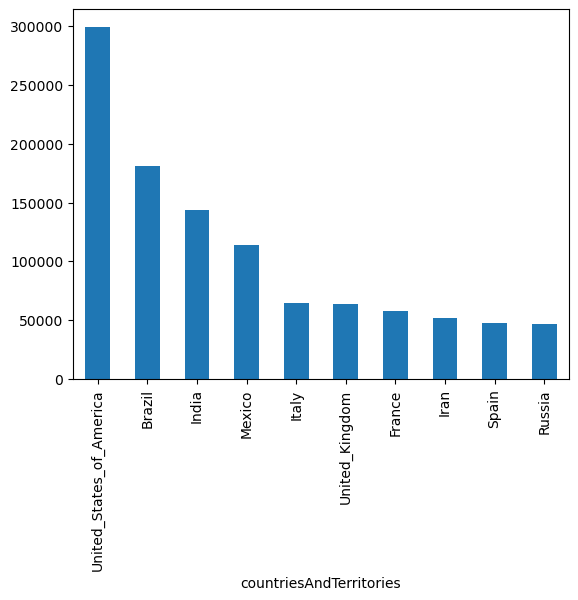

In [6]:
sum_death_by_country = df.groupby('countriesAndTerritories')['deaths'].sum()
sum_death_by_country.nlargest(10).plot.bar()

#### USA, Brazil, and India are the top 3 countries with the highest deaths.

In [8]:
pd.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## UK data

In [9]:
uk_data = df.loc[df['countriesAndTerritories'] == 'United_Kingdom']
uk_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
58378,2020-12-14,14,12,2020,18447,144,United_Kingdom,UK,GBR,66647112.0,Europe,348.216139
58379,2020-12-13,13,12,2020,21501,520,United_Kingdom,UK,GBR,66647112.0,Europe,338.775370
58380,2020-12-12,12,12,2020,21672,424,United_Kingdom,UK,GBR,66647112.0,Europe,330.327892
58381,2020-11-12,11,12,2020,20964,516,United_Kingdom,UK,GBR,66647112.0,Europe,319.925341
58382,2020-10-12,10,12,2020,16578,533,United_Kingdom,UK,GBR,66647112.0,Europe,314.810340


<AxesSubplot: xlabel='cases', ylabel='deaths'>

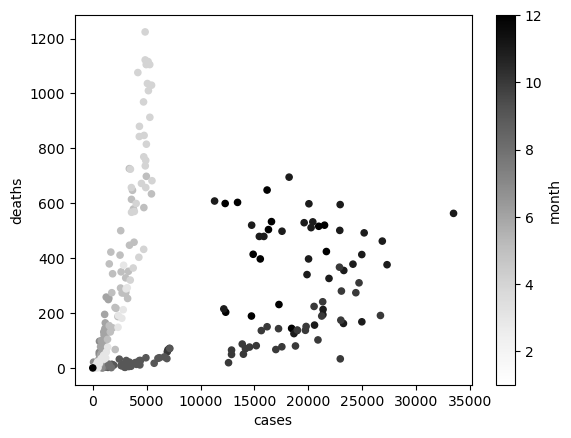

In [10]:
uk_data.plot.scatter(x = 'cases', y= 'deaths',c='month')

#### Earlier there is a higher death rate and Later there is a lower death rate.